In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,recall_score,precision_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train= pd.read_csv('Titanic_train.csv')
df_test= pd.read_csv('Titanic_test.csv')

In [3]:
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [4]:
df_train.isnull().sum()  # missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
def data_preprocess(df):
    df= df.drop(columns=['Name','Ticket','Cabin'],errors='ignore')  # dropping irrelevant columns
    
    imputer= SimpleImputer(strategy='most_frequent')  # replacing missing values
    df[:]= imputer.fit_transform(df)

    df= pd.get_dummies(df,drop_first=True)   # converting categorical columns
    return df

In [6]:
df_train= data_preprocess(df_train)    # datasets cleaning
df_test= data_preprocess(df_test)

In [7]:
df_train.isnull().sum()   # missing values removed in train dataset

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [8]:
df_train.duplicated().sum()  # no duplicate values in train dataset

0

In [9]:
df_test.isnull().sum()   # no missing values in test dataset

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [10]:
df_test.duplicated().sum()  # no duplicate values in test dataset

0

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [12]:
df_train.describe()   # statistical summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


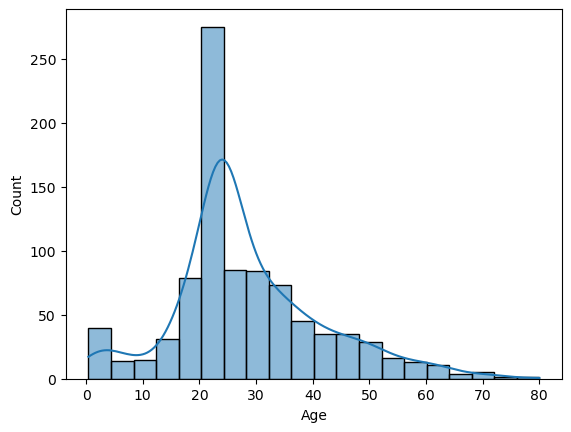

In [13]:
sns.histplot(df_train['Age'],bins=20,kde=True)  # Histogram
plt.show()

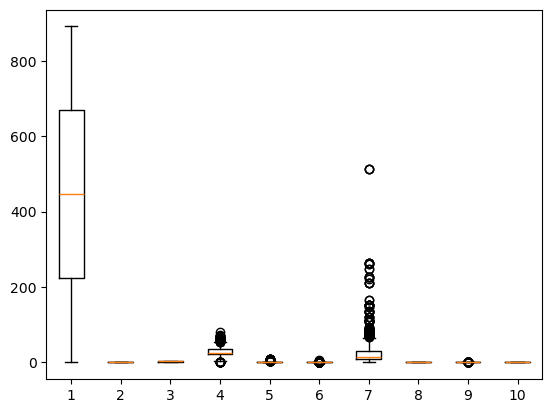

In [14]:
plt.boxplot(df_train)    # boxplot -dataset having outliers
plt.show()

In [15]:
def outlier_capping(df,column):   # oulier identify and removal using IQR method
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)

In [16]:
for i in df_train.select_dtypes(include=['float','int']).columns:
    outlier_capping(df_train,i)

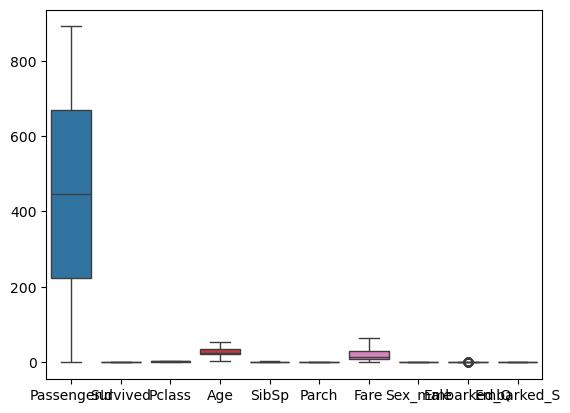

In [17]:
sns.boxplot(df_train)    # boxplot without outliers
plt.show()

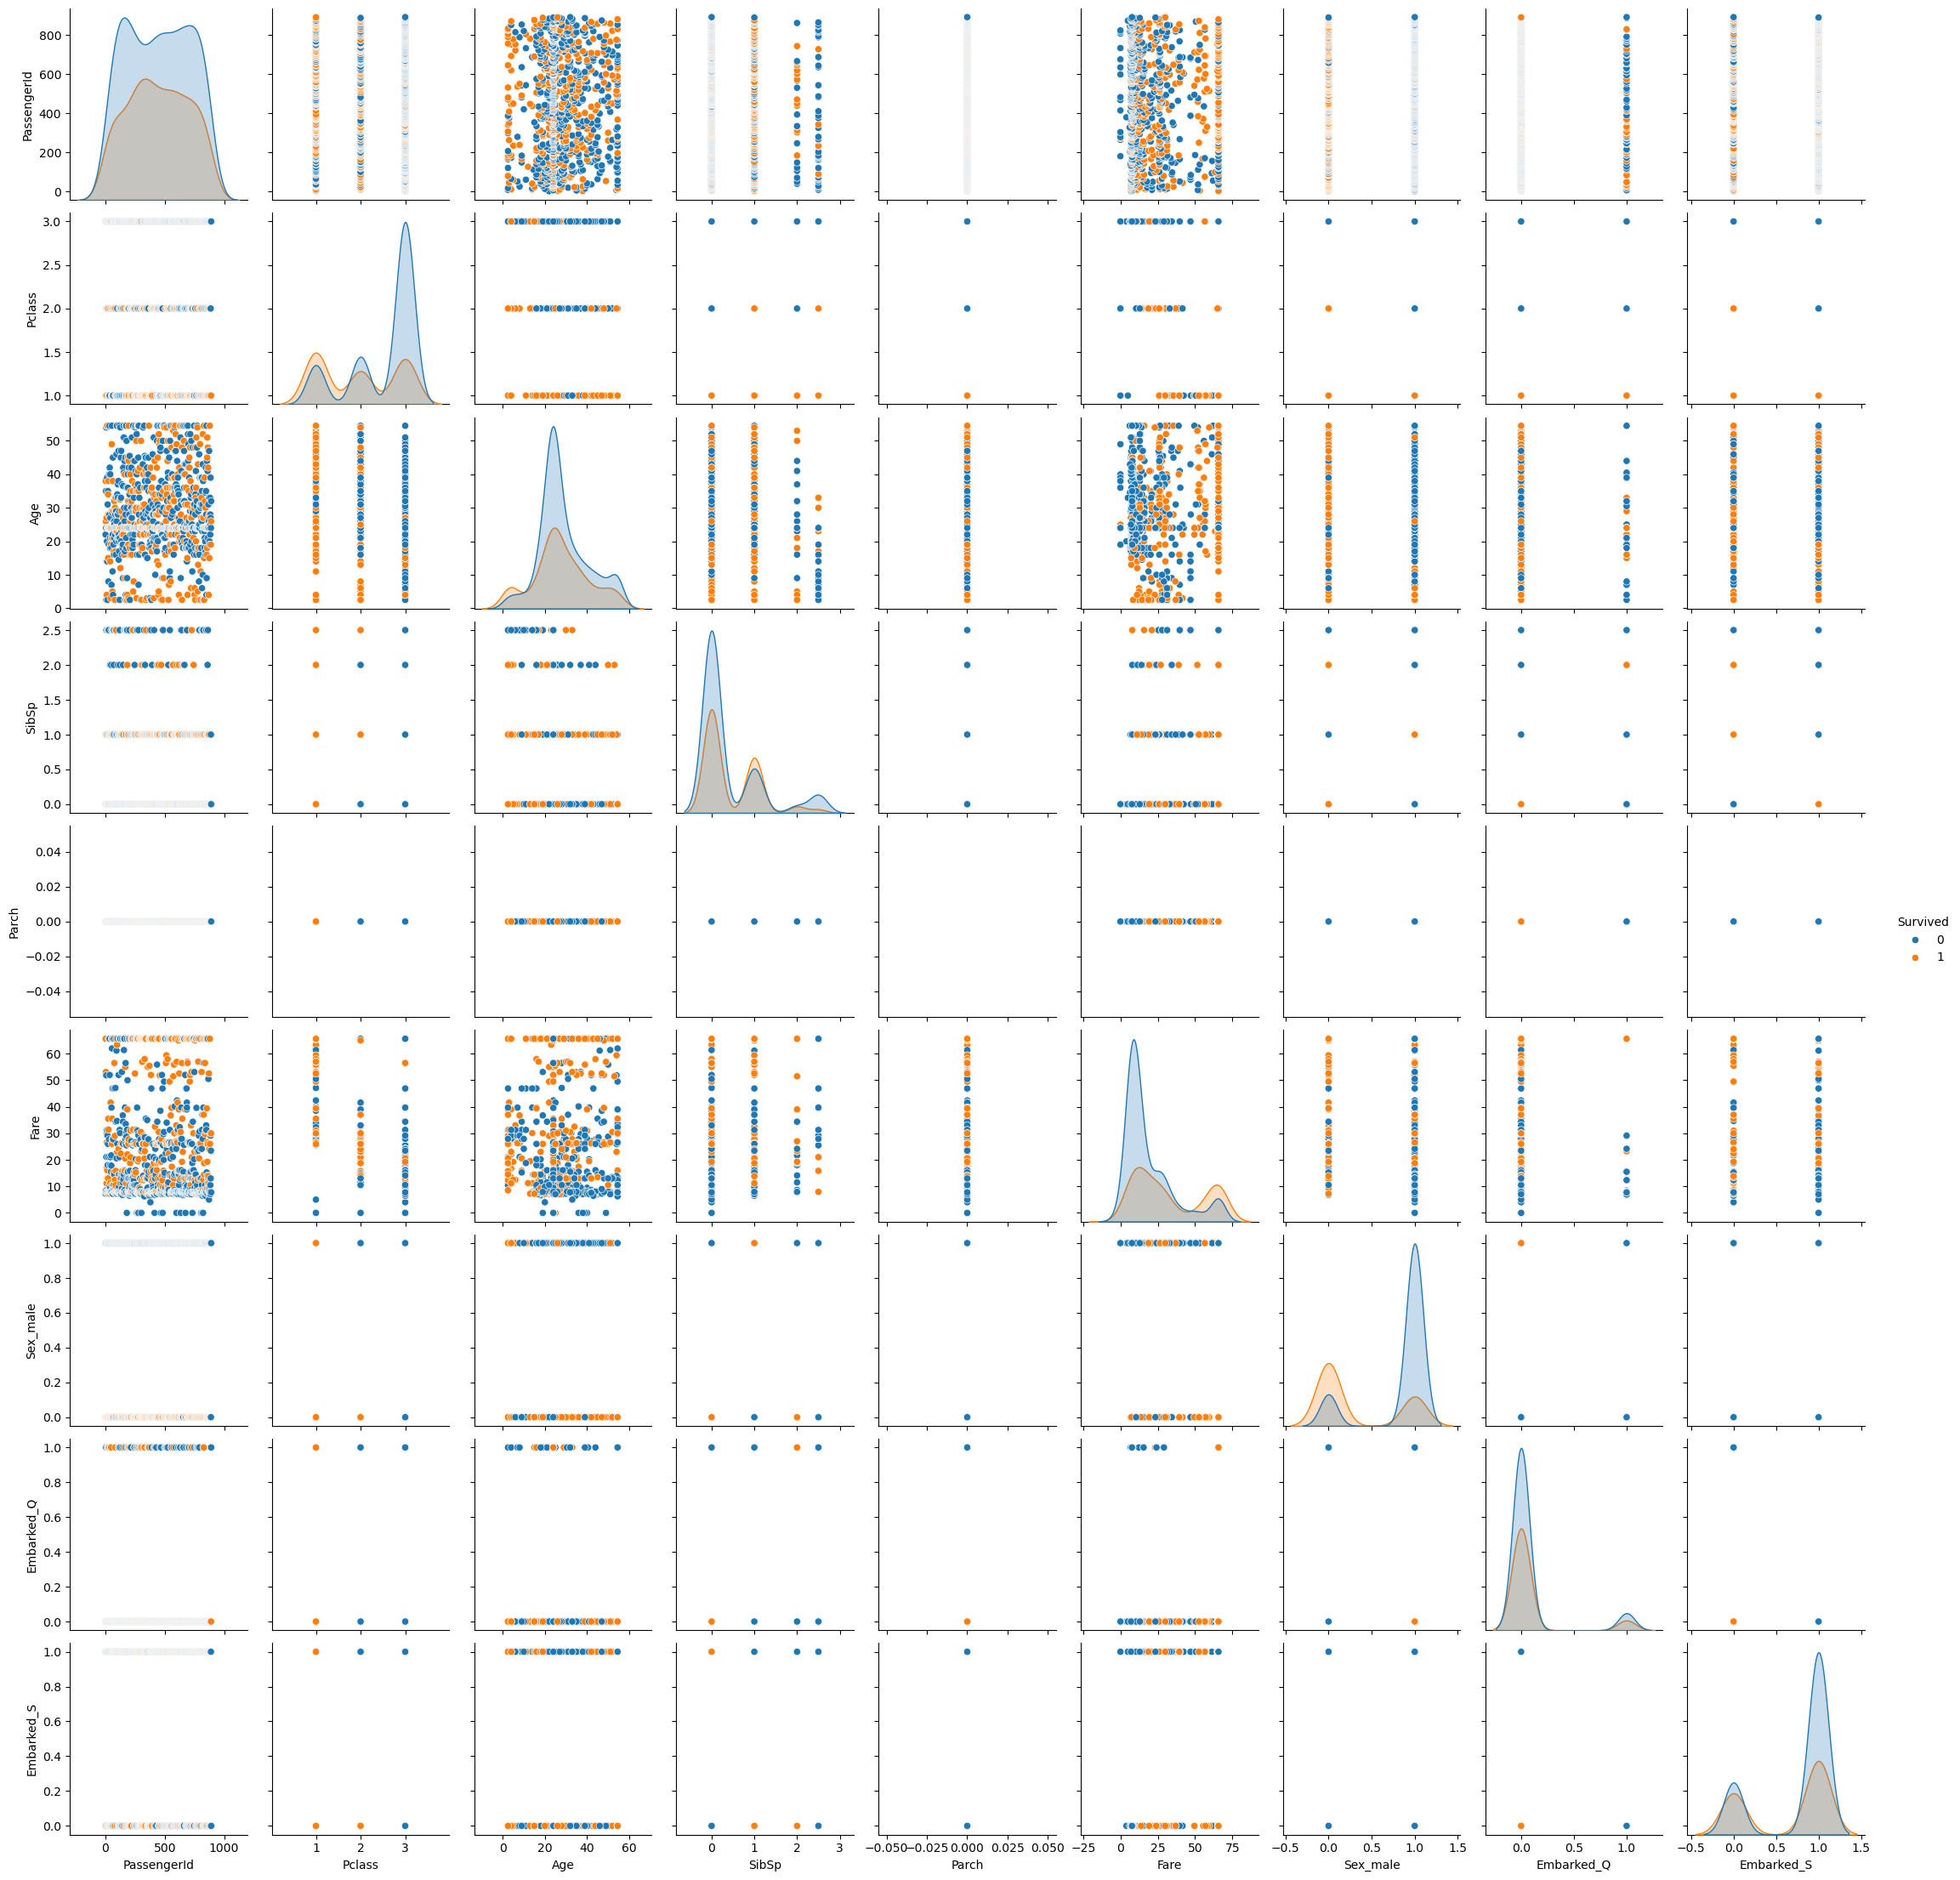

In [18]:
sns.pairplot(df_train,hue='Survived')    # Pairplot
plt.show()

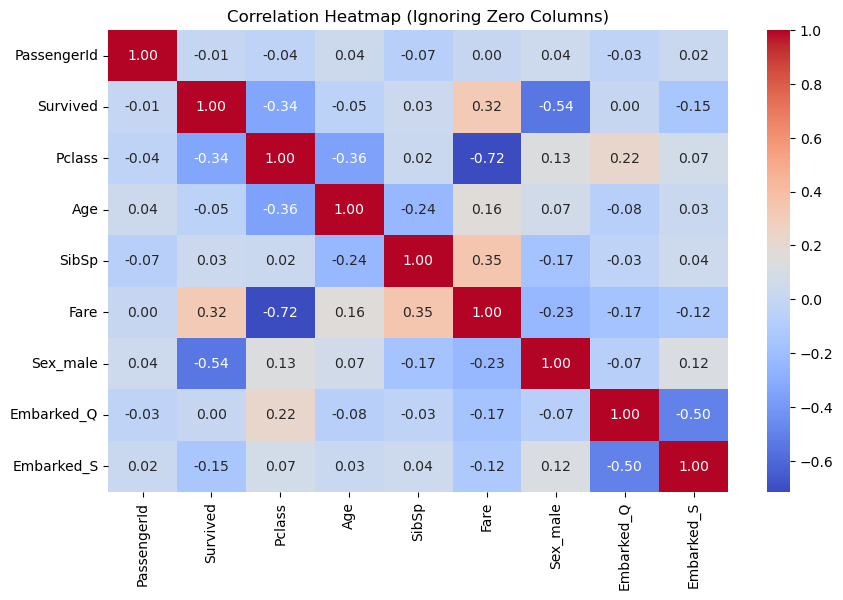

In [19]:
# Remove columns where all values are zero
filtered_df = df_train.loc[:, (df_train != 0).any(axis=0)]

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(filtered_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Ignoring Zero Columns)")
plt.show()

In [20]:
# preprocessing the training data
x= df_train.drop(columns='Survived')  # features
y= df_train['Survived']  # target 

In [21]:
# splitting the data into training and validation sets
x_train,x_val,y_train,y_val= train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(712, 9)
(179, 9)
(712,)
(179,)


In [124]:
# Training Logistic Regression Model
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [126]:
# making predictions
y_pred= model.predict(x_val)
y_pred_proba= model.predict_proba(x_val)[:,1]

In [128]:
# Evaluating model
accuracy= accuracy_score(y_val,y_pred)
precision= precision_score(y_val,y_pred)
recall= recall_score(y_val,y_pred)
f1= f1_score(y_val,y_pred)
roc_auc= roc_auc_score(y_val,y_pred_proba)

In [130]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.7877
Precision: 0.7571
Recall: 0.7162
F1 Score: 0.7361
ROC-AUC: 0.8637


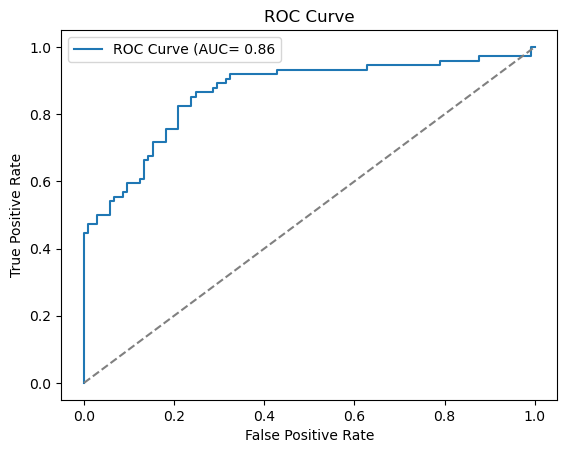

In [132]:
# ROC Curve Plotting
fpr,tpr,thr= roc_curve(y_val,y_pred_proba)
plt.plot(fpr,tpr,label=f'ROC Curve (AUC= {roc_auc:.2f}')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [134]:
# Interpreting model coefficients
feature_names= x_train.columns

In [136]:
coefficients= model.coef_[0]  # model coefficients

In [138]:
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False) 

In [140]:
print(coef_df)

       Feature  Coefficient
8   Embarked_S     0.225107
7   Embarked_Q     0.022546
5         Fare     0.015160
0  PassengerId     0.000559
4        Parch     0.000000
2          Age    -0.020886
3        SibSp    -0.347788
1       Pclass    -0.680071
6     Sex_male    -2.541810


male have less survival rate compared to female.  
older passengers have slightly lower survival rate.  
pclass passengers had lower survial chances.  
Fare had higher fare increased chances.  
passengers from embarked S had lower survival chances.  
passengers from embarked Q had higher suvival chances.  

In [143]:
# Deployement using Streamlit
!pip install streamlit

In [144]:
import streamlit as st

In [145]:
import pickle
file= 'logreg.pkl'

In [149]:
pickle.dump(model,open(file,'wb'))

In [151]:
model= pickle.load(open('logreg.pkl','rb'))

In [153]:
st.title('would you have survived the Titanic?')

DeltaGenerator()

In [155]:
def user_input(df):
    Gender= st.sidebar.selectbox('Gender,Male=1,Female=0',[0,1])
    Age= st.sidebar.select_slider('Age',[0,100])
    Ticket= st.sidebar.select_slider('Ticket',[10,100])
    data={'Gender':Gender,'Age':Age,'Ticket':Ticket}
    features= pd.DataFrame(data,index=[0])
    return features

In [157]:
df_train= user_input(df_train)

In [173]:
pred_prob= model.predict_proba(df_test)

In [175]:
predicted= model.predict(df_test)